<a href="https://colab.research.google.com/github/JamesJs/T-picos-Especiais---Deep-Learning-aplicado-Vis-o-Computacional/blob/main/Tarefa2_DigitosMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 2 - Dígitos MNIST com rede totalmente conectada

O objetivo é adaptar o classificador mostrado para a base Fashion MNIST para a base de Dígitos do MNIST, que contem amostras de dígitos manuscritos de 0 a 9, devidamente rotulados. 

O classificador deve treinar até atingir acurácia de 99% e ser interrompido por uma callback. O treinamento deve acabar antes de se completar 10 épocas. 

Você deve completar os trechos indicados do código. 



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:

#Carregando dataset
mnist = tf.keras.datasets.mnist
#Obtendo data de trainamento e de teste.
(image_train, label_train),(image_test, label_test) = mnist.load_data()

4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0 

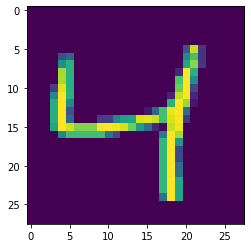

In [3]:
#https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
#Número de caracteres por linha
np.set_printoptions(linewidth=200)
item = 2
plt.imshow(image_train[item])
print(label_train[item])
print(image_train[item])

4
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

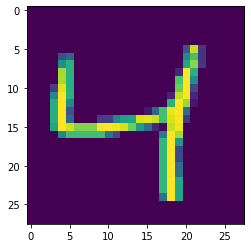

In [4]:
#Não era para ter mudado a imagem?
image_train = image_train/255.0
image_test = image_test/255.0
plt.imshow(image_train[item])
print(label_train[item])
print(image_train[item])

In [39]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(300, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.sigmoid)
])

In [37]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>=0.99):
      print("Acurácia de 99% atingida")
      self.model.stop_training = True

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(image_train, label_train, epochs=10,callbacks=[callback()],validation_data=(image_test, label_test),verbose=1,batch_size=20)

Epoch 1/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2217 - accuracy: 0.9343 - val_loss: 0.1374 - val_accuracy: 0.9566
Epoch 2/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0913 - accuracy: 0.9717 - val_loss: 0.0806 - val_accuracy: 0.9746
Epoch 3/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.0749 - val_accuracy: 0.9766
Epoch 4/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0747 - val_accuracy: 0.9771
Epoch 5/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0719 - val_accuracy: 0.9792
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0801 - val_accuracy: 0.9772
Acurácia de 99% atingida


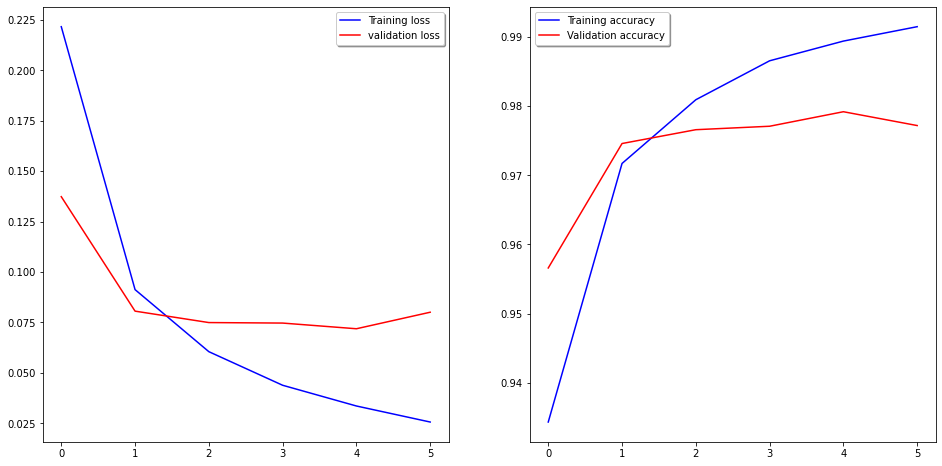

In [41]:
#https://colab.research.google.com/github/jsansao/dlvc/blob/main/Licao2bis_MLP_XOR.ipynb#scrollTo=Ls60pOJHiDi9
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

[9.1306913e-11 1.4755528e-05 2.0002943e-01 4.5608748e-09 1.9512138e-18 6.2997030e-10 1.0068701e-09 1.7927989e-12 2.6475027e-09 1.2955175e-13]
2


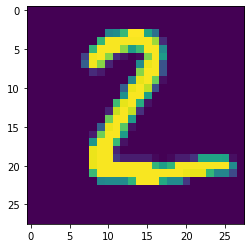

In [46]:
classifications = model.predict(image_test)
print(classifications[1])
print(label_test[1])
plt.imshow(image_test[1])

Valor previsto: 7
Valor real: 7


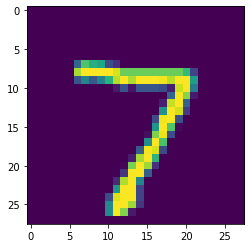

Valor previsto: 2
Valor real: 2


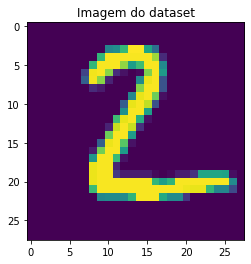

Valor previsto: 1
Valor real: 1


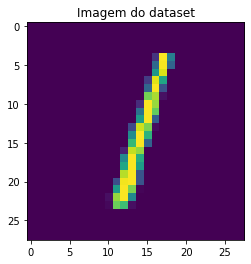

Valor previsto: 0
Valor real: 0


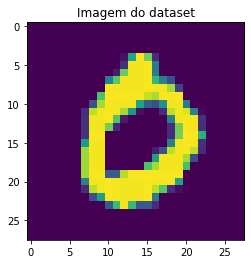

Valor previsto: 4
Valor real: 4


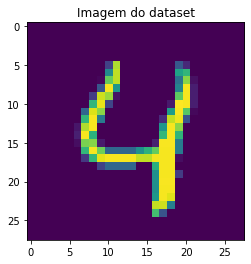

Valor previsto: 1
Valor real: 1


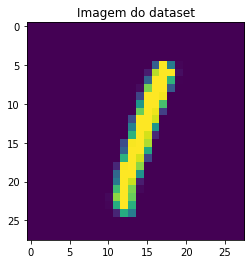

Valor previsto: 4
Valor real: 4


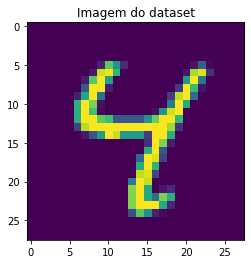

Valor previsto: 9
Valor real: 9


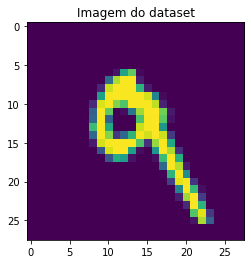

Valor previsto: 5
Valor real: 5


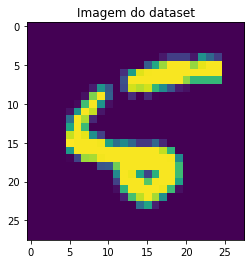

Valor previsto: 9
Valor real: 9


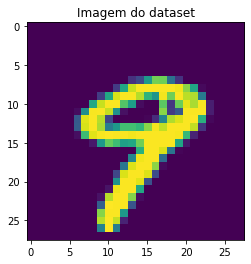

Valor previsto: 0
Valor real: 0


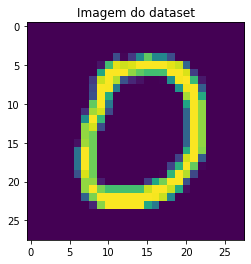

Valor previsto: 6
Valor real: 6


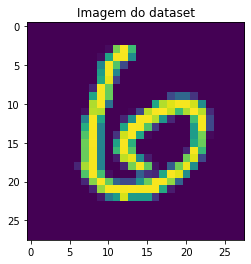

Valor previsto: 9
Valor real: 9


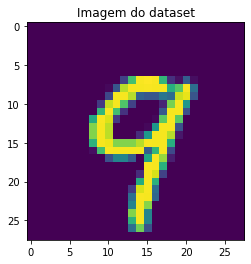

Valor previsto: 0
Valor real: 0


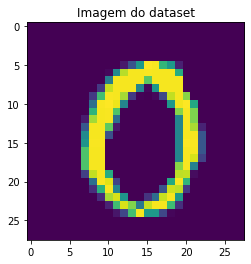

Valor previsto: 1
Valor real: 1


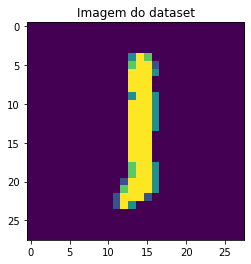

Valor previsto: 5
Valor real: 5


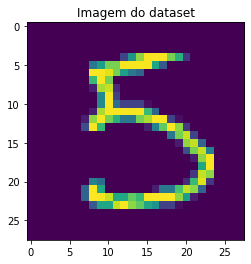

Valor previsto: 9
Valor real: 9


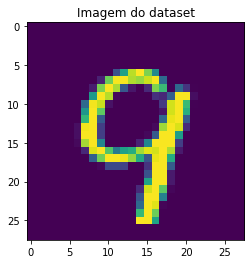

Valor previsto: 7
Valor real: 7


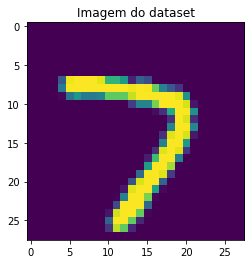

Valor previsto: 3
Valor real: 3


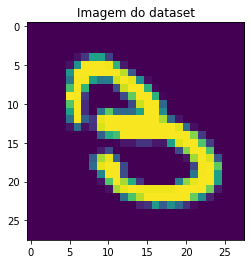

Valor previsto: 4
Valor real: 4


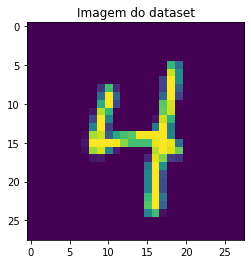

Valor previsto: 9
Valor real: 9


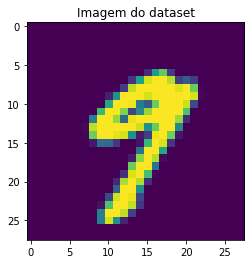

Valor previsto: 6
Valor real: 6


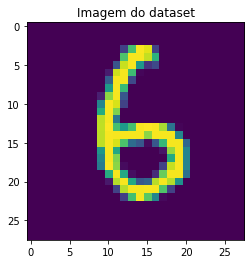

Valor previsto: 6
Valor real: 6


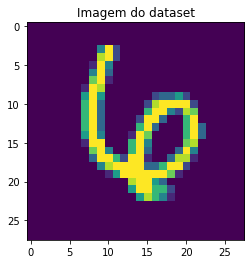

Valor previsto: 5
Valor real: 5


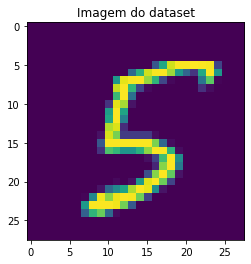

Valor previsto: 4
Valor real: 4


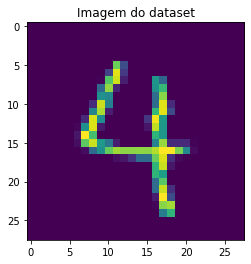

Valor previsto: 0
Valor real: 0


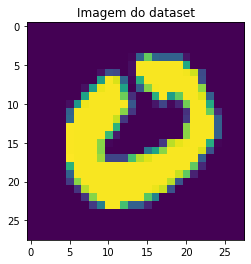

Valor previsto: 7
Valor real: 7


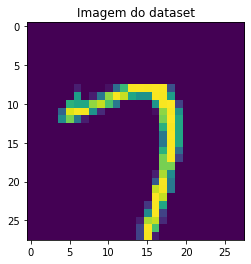

Valor previsto: 4
Valor real: 4


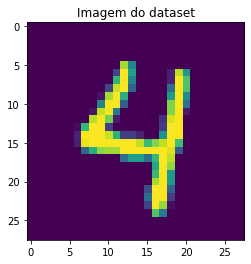

Valor previsto: 0
Valor real: 0


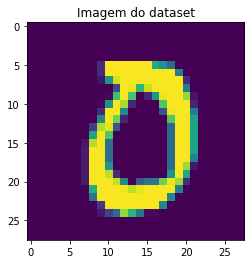

Valor previsto: 1
Valor real: 1


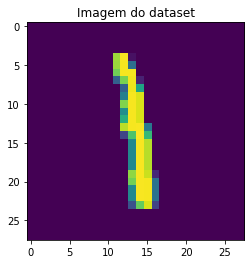

Valor previsto: 3
Valor real: 3


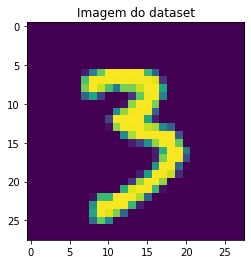

Valor previsto: 1
Valor real: 1


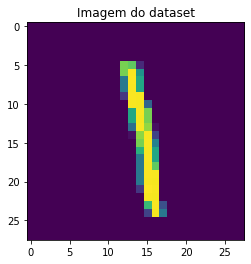

Valor previsto: 3
Valor real: 3


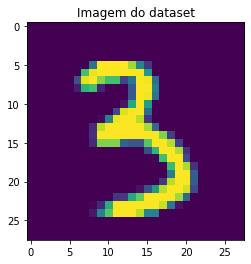

Valor previsto: 4
Valor real: 4


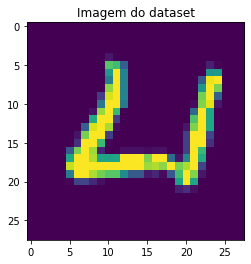

Valor previsto: 7
Valor real: 7


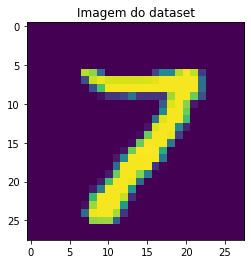

Valor previsto: 2
Valor real: 2


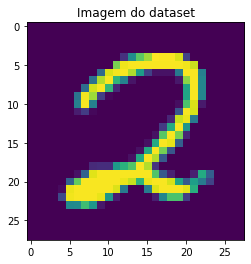

Valor previsto: 7
Valor real: 7


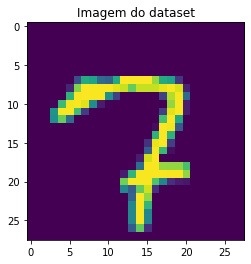

Valor previsto: 1
Valor real: 1


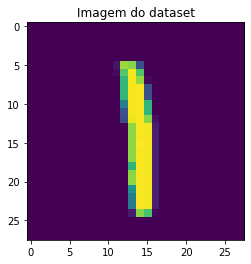

Valor previsto: 2
Valor real: 2


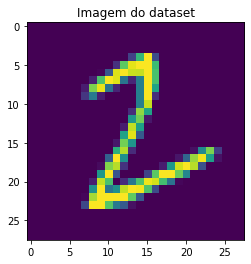

Valor previsto: 1
Valor real: 1


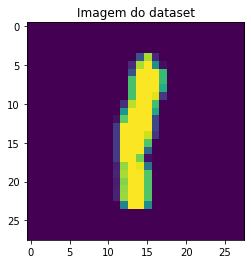

Valor previsto: 1
Valor real: 1


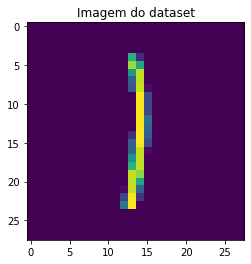

Valor previsto: 7
Valor real: 7


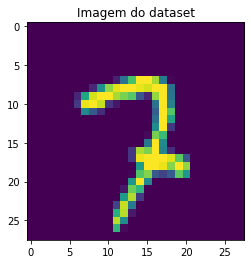

Valor previsto: 4
Valor real: 4


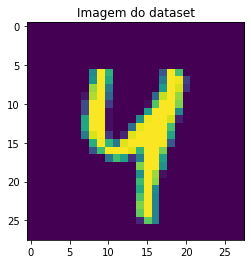

Valor previsto: 2
Valor real: 2


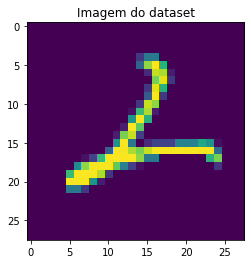

Valor previsto: 3
Valor real: 3


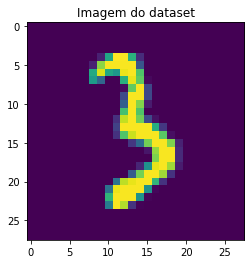

Valor previsto: 5
Valor real: 5


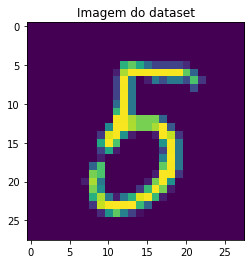

Valor previsto: 1
Valor real: 1


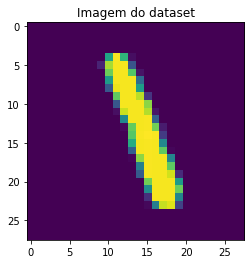

Valor previsto: 2
Valor real: 2


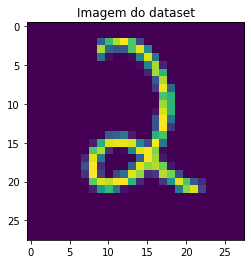

Valor previsto: 4
Valor real: 4


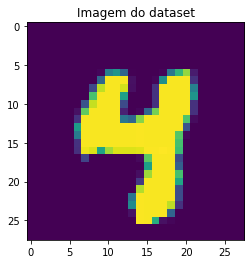

Valor previsto: 4
Valor real: 4


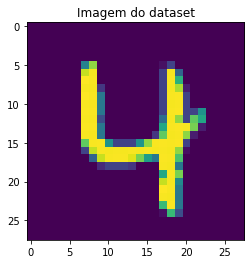

Valor previsto: 6
Valor real: 6


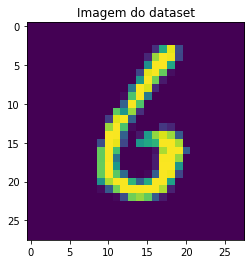

Valor previsto: 3
Valor real: 3


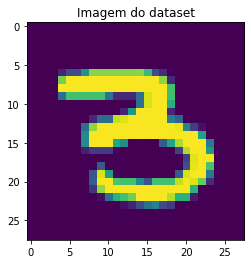

Valor previsto: 5
Valor real: 5


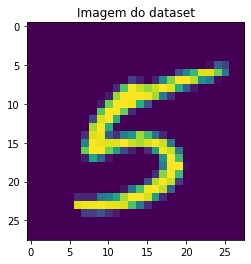

Valor previsto: 5
Valor real: 5


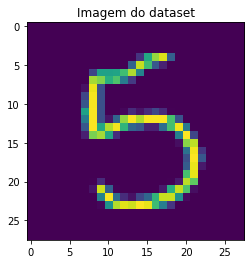

Valor previsto: 6
Valor real: 6


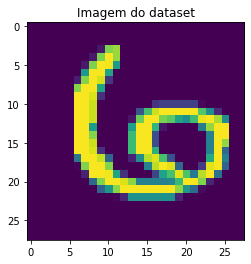

Valor previsto: 0
Valor real: 0


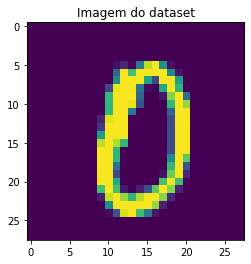

Valor previsto: 4
Valor real: 4


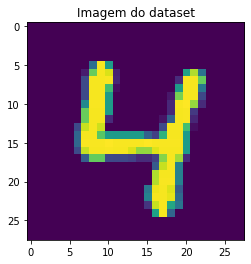

Valor previsto: 1
Valor real: 1


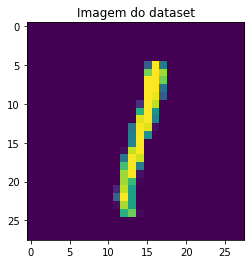

Valor previsto: 9
Valor real: 9


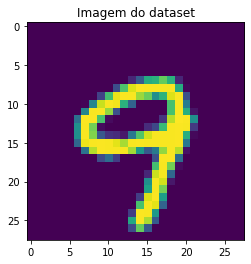

Valor previsto: 5
Valor real: 5


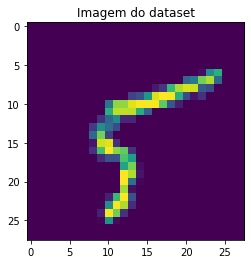

Valor previsto: 7
Valor real: 7


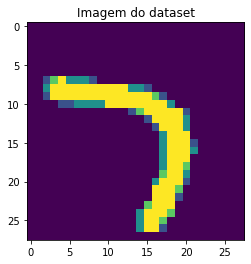

Valor previsto: 8
Valor real: 8


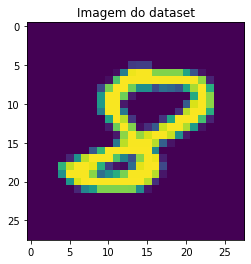

Valor previsto: 9
Valor real: 9


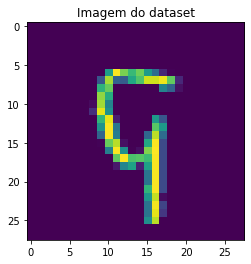

Valor previsto: 3
Valor real: 3


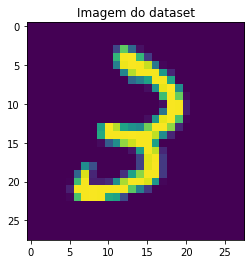

Valor previsto: 7
Valor real: 7


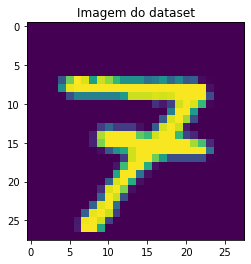

Valor previsto: 4
Valor real: 4


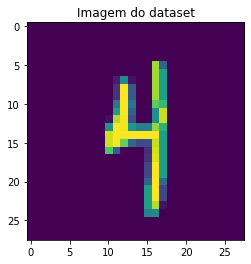

Valor previsto: 6
Valor real: 6


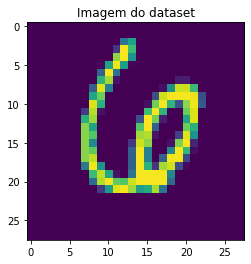

Valor previsto: 4
Valor real: 4


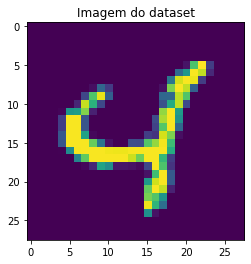

Valor previsto: 3
Valor real: 3


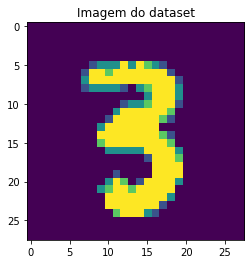

Valor previsto: 0
Valor real: 0


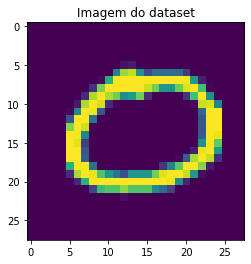

Valor previsto: 7
Valor real: 7


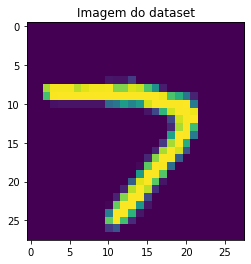

Valor previsto: 0
Valor real: 0


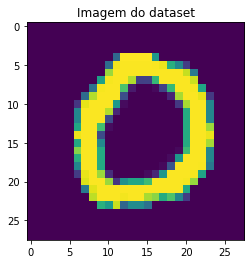

Valor previsto: 2
Valor real: 2


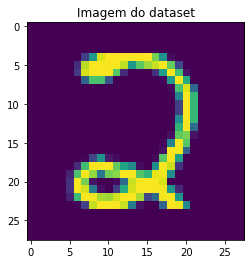

Valor previsto: 9
Valor real: 9


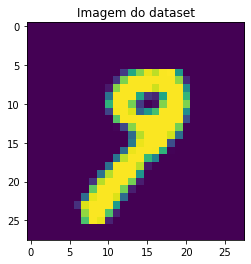

Valor previsto: 1
Valor real: 1


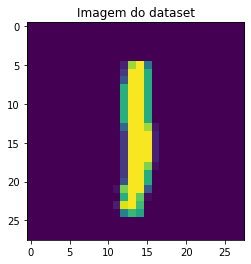

Valor previsto: 7
Valor real: 7


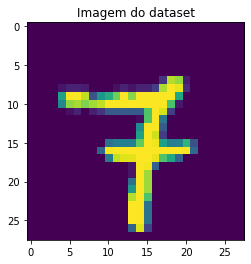

Valor previsto: 3
Valor real: 3


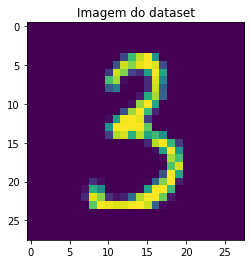

Valor previsto: 2
Valor real: 2


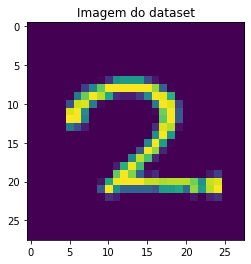

Valor previsto: 9
Valor real: 9


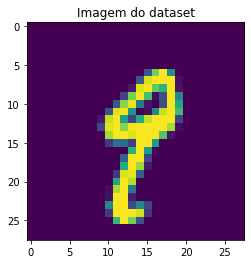

Valor previsto: 7
Valor real: 7


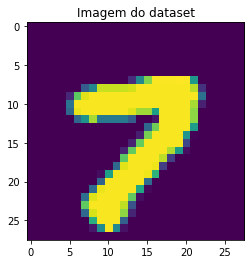

Valor previsto: 7
Valor real: 7


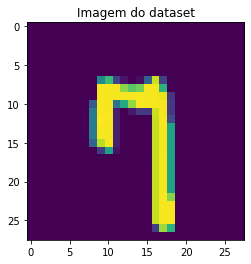

Valor previsto: 6
Valor real: 6


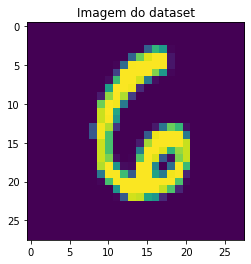

Valor previsto: 2
Valor real: 2


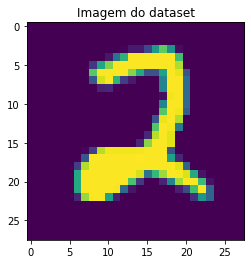

Valor previsto: 7
Valor real: 7


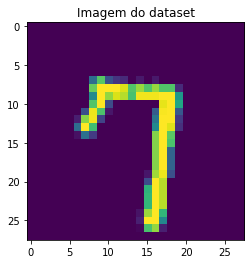

Valor previsto: 8
Valor real: 8


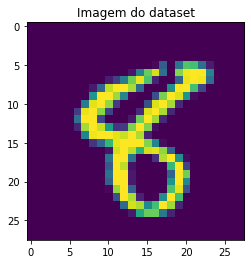

Valor previsto: 4
Valor real: 4


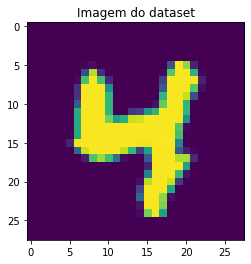

Valor previsto: 7
Valor real: 7


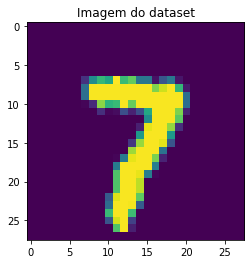

Valor previsto: 3
Valor real: 3


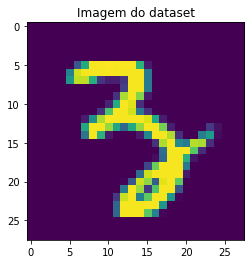

Valor previsto: 6
Valor real: 6


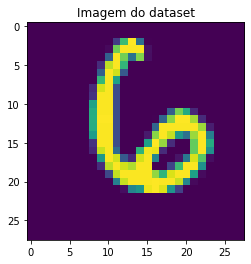

Valor previsto: 1
Valor real: 1


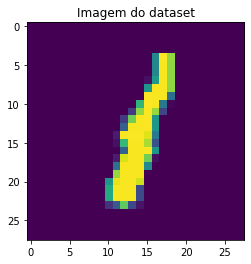

Valor previsto: 3
Valor real: 3


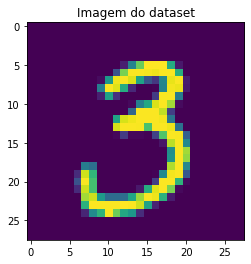

Valor previsto: 6
Valor real: 6


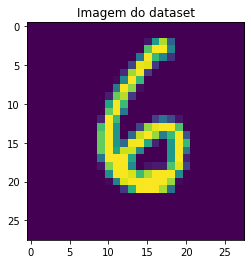

Valor previsto: 9
Valor real: 9


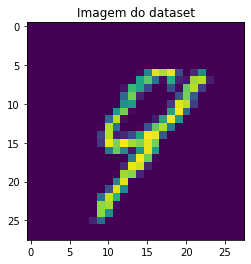

Valor previsto: 3
Valor real: 3


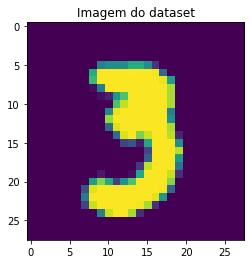

Valor previsto: 1
Valor real: 1


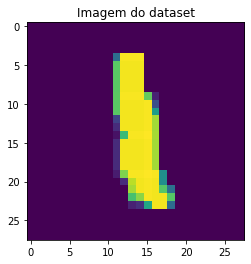

Valor previsto: 4
Valor real: 4


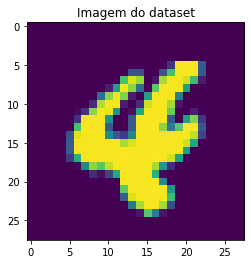

Valor previsto: 1
Valor real: 1


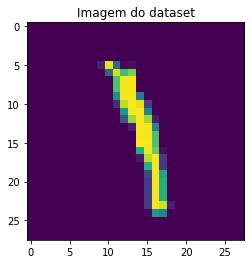

Valor previsto: 7
Valor real: 7


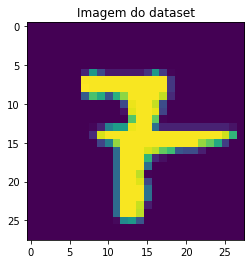

Valor previsto: 6
Valor real: 6


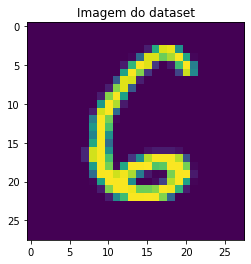

Valor previsto: 9
Valor real: 9


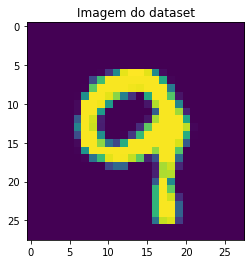

Valor previsto: 6
Valor real: 6


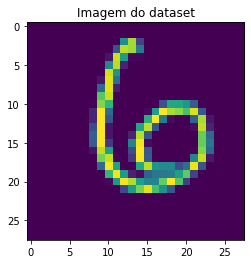

Valor previsto: 0
Valor real: 0


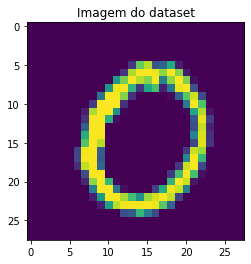

Valor previsto: 5
Valor real: 5


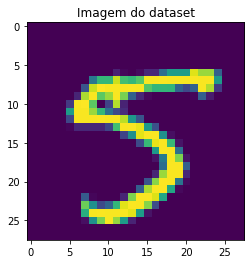

Valor previsto: 4
Valor real: 4


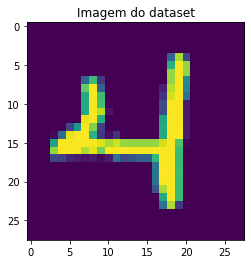

Valor previsto: 9
Valor real: 9


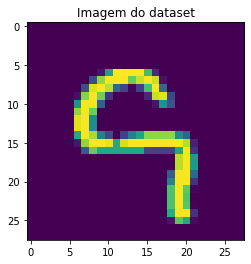

Valor previsto: 9
Valor real: 9


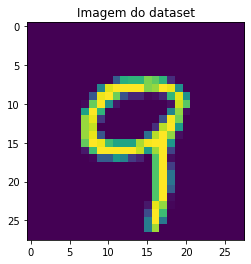

Valor previsto: 2
Valor real: 2


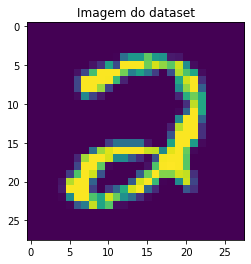

Valor previsto: 1
Valor real: 1


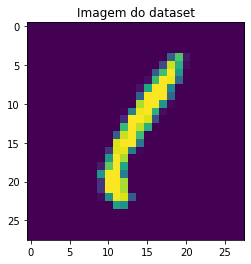

Valor previsto: 9
Valor real: 9


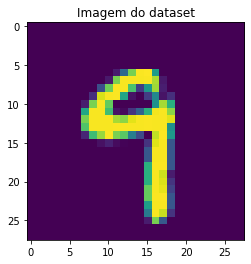

Valor previsto: 4
Valor real: 4


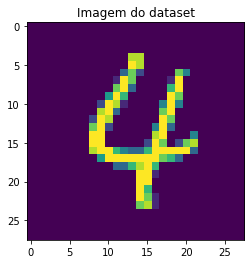

Valor previsto: 8
Valor real: 8


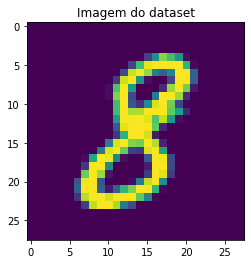

Valor previsto: 1
Valor real: 7


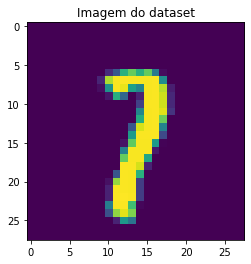

Valor previsto: 3
Valor real: 3


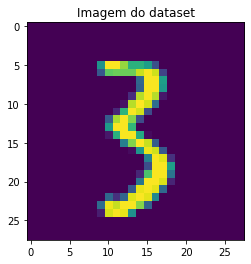

Valor previsto: 9
Valor real: 9


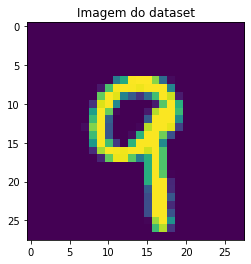

Valor previsto: 7
Valor real: 7


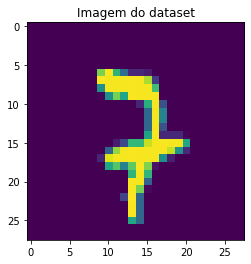

Valor previsto: 9
Valor real: 4


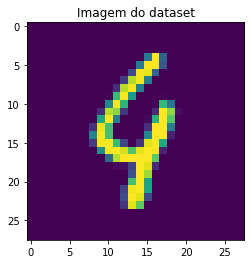

Valor previsto: 4
Valor real: 4


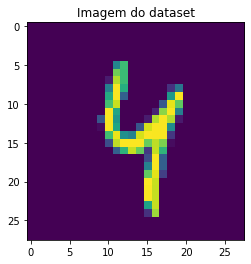

Valor previsto: 4
Valor real: 4


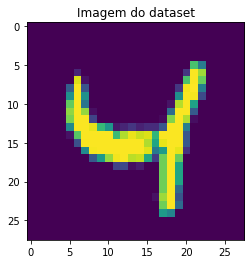

Valor previsto: 9
Valor real: 9


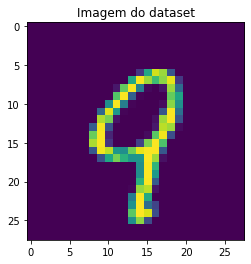

Valor previsto: 2
Valor real: 2


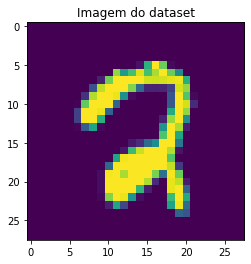

Valor previsto: 5
Valor real: 5


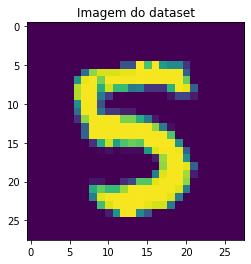

Valor previsto: 4
Valor real: 4


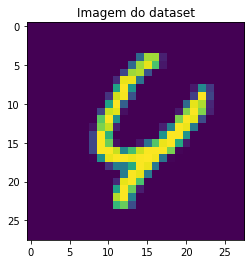

Valor previsto: 7
Valor real: 7


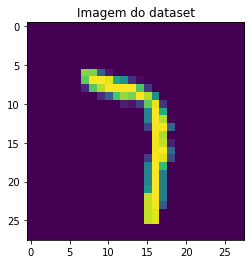

Valor previsto: 6
Valor real: 6


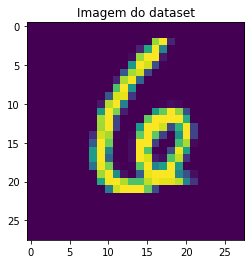

Valor previsto: 7
Valor real: 7


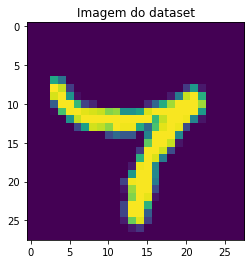

Valor previsto: 9
Valor real: 9


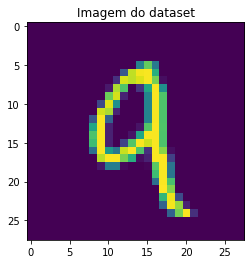

Valor previsto: 0
Valor real: 0


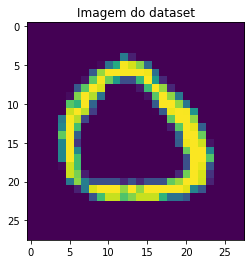

Valor previsto: 5
Valor real: 5


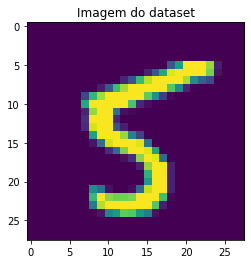

Valor previsto: 8
Valor real: 8


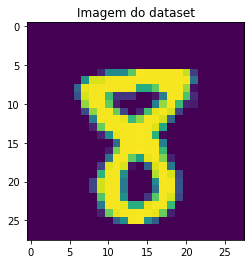

Valor previsto: 5
Valor real: 5


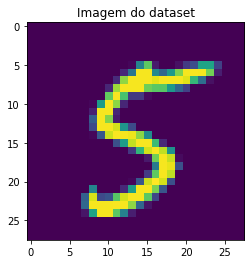

Valor previsto: 6
Valor real: 6


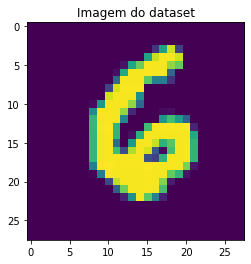

Valor previsto: 6
Valor real: 6


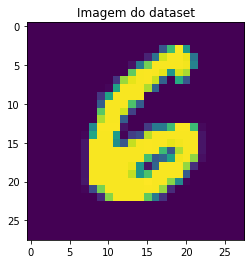

Valor previsto: 5
Valor real: 5


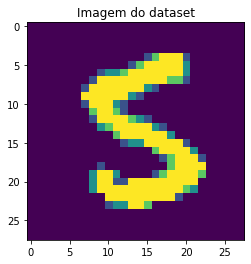

Valor previsto: 7
Valor real: 7


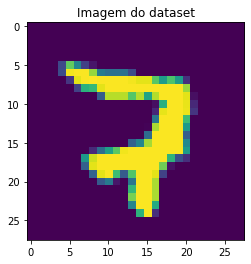

Valor previsto: 8
Valor real: 8


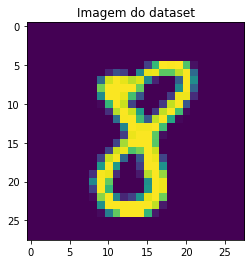

Valor previsto: 1
Valor real: 1


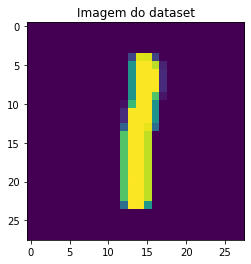

Valor previsto: 0
Valor real: 0


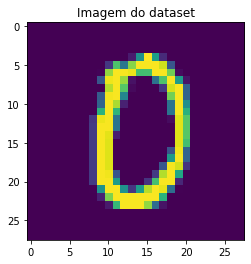

Valor previsto: 1
Valor real: 1


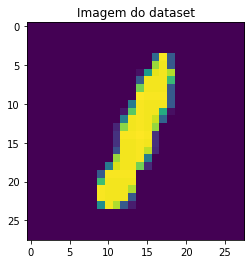

Valor previsto: 6
Valor real: 6


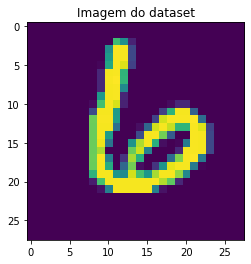

Valor previsto: 4
Valor real: 4


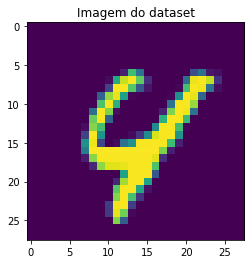

Valor previsto: 6
Valor real: 6


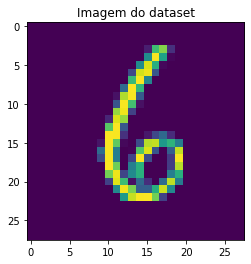

Valor previsto: 7
Valor real: 7


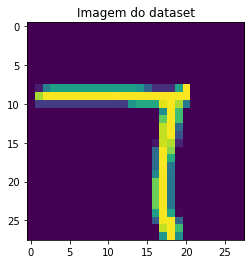

Valor previsto: 3
Valor real: 3


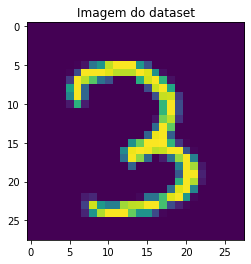

Valor previsto: 1
Valor real: 1


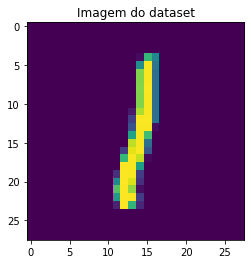

Valor previsto: 7
Valor real: 7


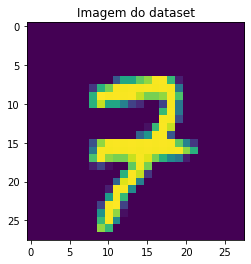

Valor previsto: 1
Valor real: 1


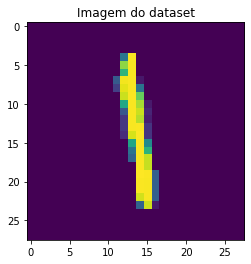

Valor previsto: 8
Valor real: 8


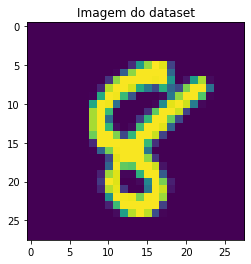

Valor previsto: 2
Valor real: 2


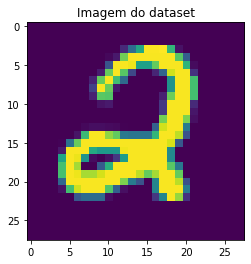

Valor previsto: 0
Valor real: 0


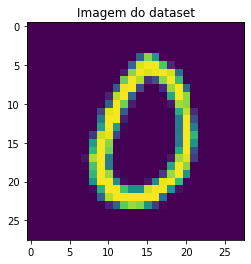

Valor previsto: 9
Valor real: 2


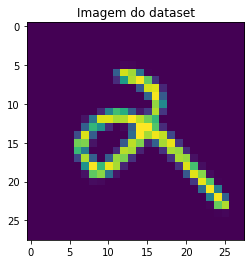

Valor previsto: 9
Valor real: 9


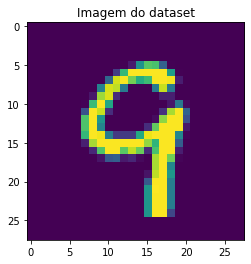

Valor previsto: 8
Valor real: 9


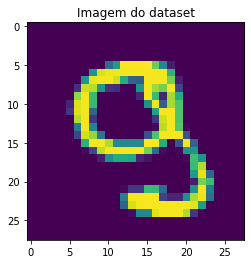

Valor previsto: 5
Valor real: 5


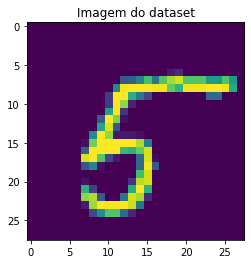

Valor previsto: 5
Valor real: 5


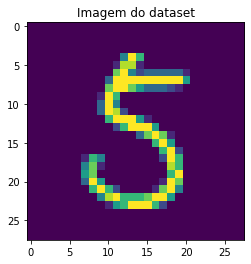

Valor previsto: 1
Valor real: 1


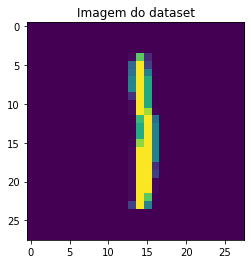

Valor previsto: 5
Valor real: 5


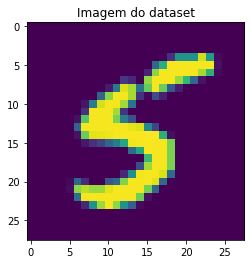

Valor previsto: 6
Valor real: 6


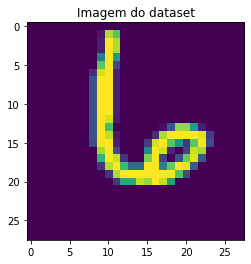

Valor previsto: 0
Valor real: 0


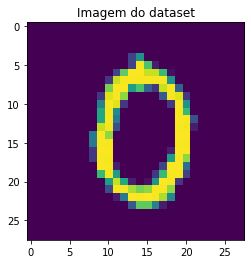

Valor previsto: 3
Valor real: 3


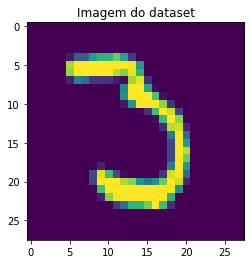

Valor previsto: 4
Valor real: 4


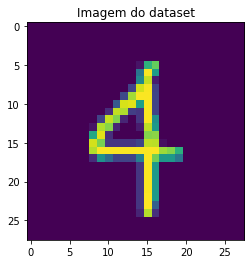

Valor previsto: 4
Valor real: 4


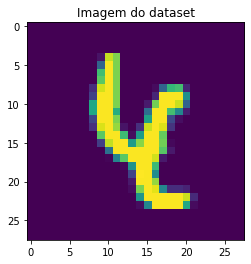

Valor previsto: 6
Valor real: 6


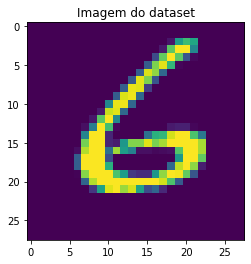

Valor previsto: 5
Valor real: 5


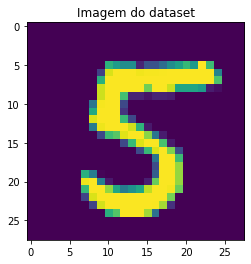

Valor previsto: 4
Valor real: 4


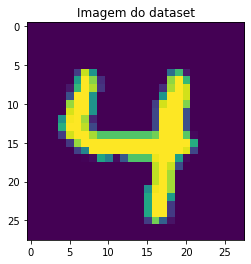

Valor previsto: 6
Valor real: 6


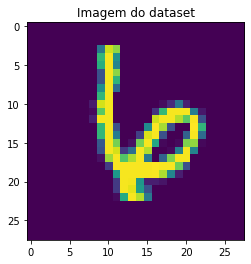

Valor previsto: 5
Valor real: 5


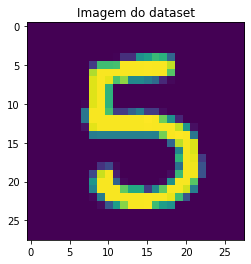

Valor previsto: 4
Valor real: 4


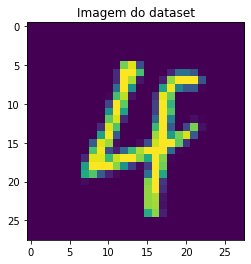

Valor previsto: 5
Valor real: 5


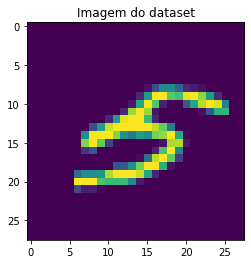

Valor previsto: 1
Valor real: 1


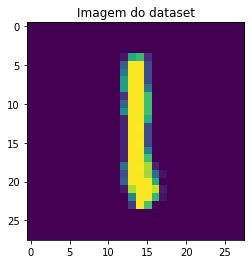

Valor previsto: 4
Valor real: 4


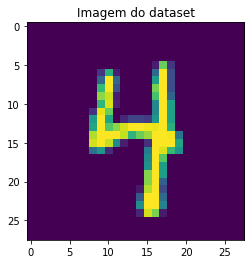

Valor previsto: 4
Valor real: 4


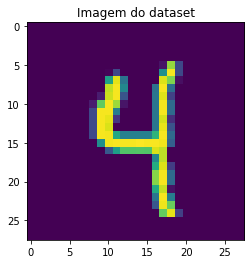

Valor previsto: 7
Valor real: 7


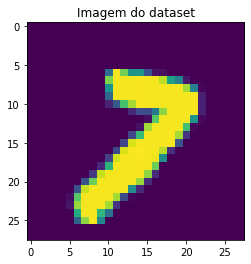

Valor previsto: 2
Valor real: 2


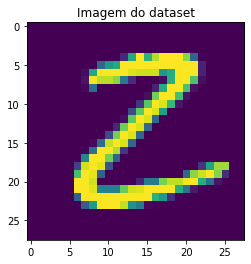

Valor previsto: 3
Valor real: 3


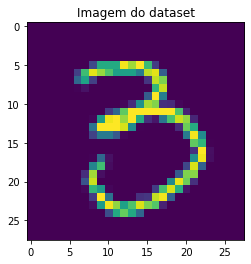

Valor previsto: 2
Valor real: 2


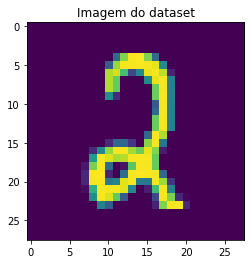

Valor previsto: 7
Valor real: 7


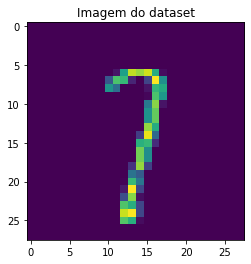

Valor previsto: 1
Valor real: 1


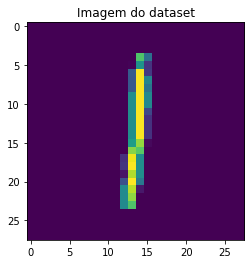

Valor previsto: 8
Valor real: 8


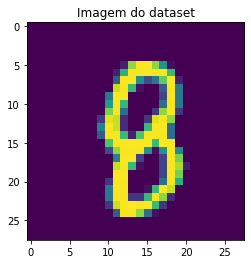

Valor previsto: 1
Valor real: 1


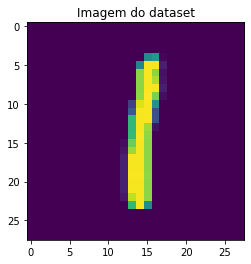

Valor previsto: 8
Valor real: 8


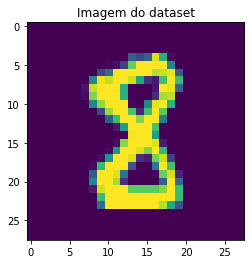

Valor previsto: 1
Valor real: 1


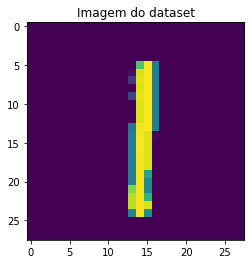

Valor previsto: 8
Valor real: 8


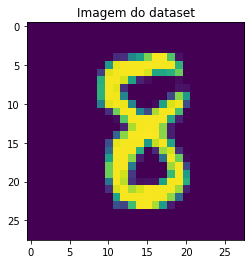

Valor previsto: 5
Valor real: 5


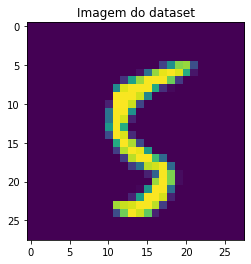

Valor previsto: 0
Valor real: 0


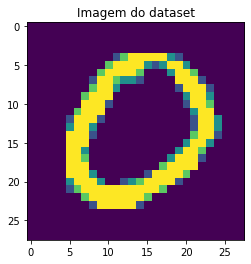

Valor previsto: 8
Valor real: 8


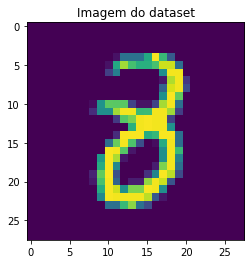

Valor previsto: 9
Valor real: 9


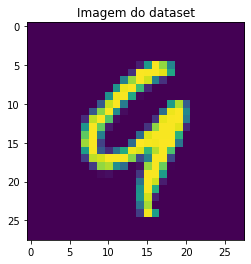

Valor previsto: 2
Valor real: 2


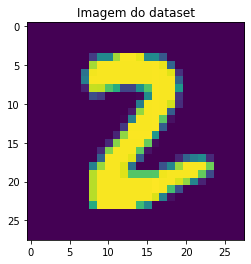

Valor previsto: 5
Valor real: 5


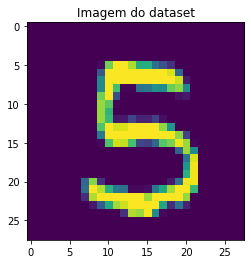

Valor previsto: 0
Valor real: 0


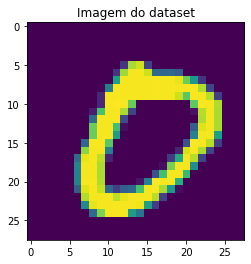

Valor previsto: 1
Valor real: 1


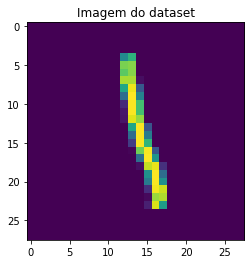

Valor previsto: 1
Valor real: 1


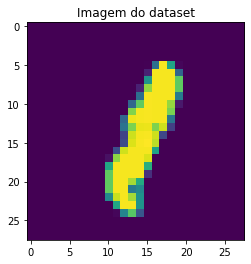

Valor previsto: 1
Valor real: 1


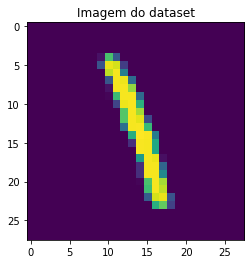

Valor previsto: 0
Valor real: 0


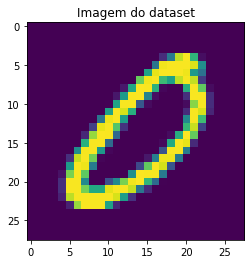

Valor previsto: 9
Valor real: 9


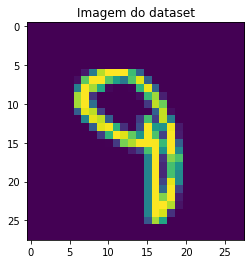

Valor previsto: 0
Valor real: 0


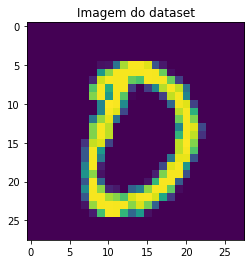

Valor previsto: 3
Valor real: 3


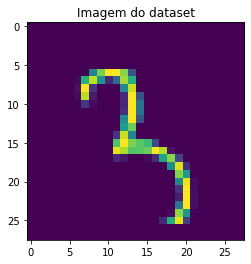

Valor previsto: 1
Valor real: 1


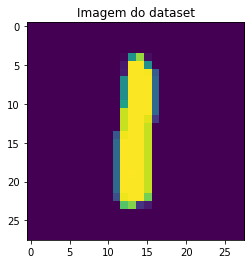

Valor previsto: 6
Valor real: 6


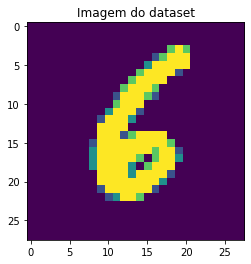

Valor previsto: 4
Valor real: 4


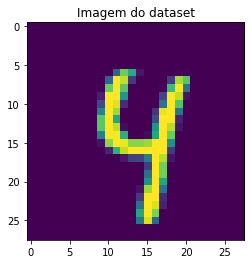

Valor previsto: 2
Valor real: 2


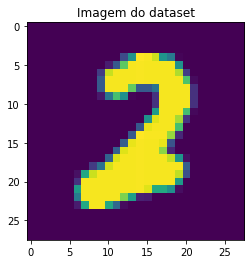

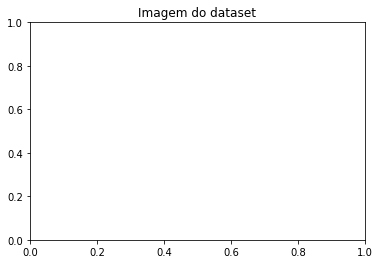

In [61]:
classifications = model.predict(image_test)
for i in range(200):
  print("Valor previsto: " + str(np.argmax(classifications[i])))
  print("Valor real: " + str(label_test[i]))
  plt.imshow(image_test[i])
  plt.show()
  plt.title("Imagem do dataset")